# Circuit Layer Operations Per Second (CLOPS)

In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Set IQM Token if using Resonance

In [8]:
# import os
# os.environ["IQM_TOKEN"] = "xxxxxxxxxxxxxxx"

## Choose (or define) a backend

In [9]:
#backend = "fakeadonis"
#backend = "fakeapollo"
backend = "garnet"
#backend = "deneb"

## CLOPS Configuration

In [10]:
from iqm.benchmarks.quantum_volume.clops import *

In [11]:
EXAMPLE_CLOPS = CLOPSConfiguration(
    qubits=[2, 3, 7, 8, 12],
    num_circuits=100, # By definition set to 100
    num_updates=10, # By definition set to 10
    num_shots=100, # By definition set to 100
    calset_id=None,
)

## Run the experiment

In [12]:
benchmark_clops = CLOPSBenchmark(backend, EXAMPLE_CLOPS)
run_clops = benchmark_clops.run()

2025-03-31 15:33:57,096 - iqm.benchmarks.logging_config - INFO - NB: CLOPS should be estimated with same qubit layout and optional inputs used to establish QV!
2025-03-31 15:33:57,097 - iqm.benchmarks.logging_config - INFO - Now generating 100 parametrized circuit templates on qubits [2, 3, 7, 8, 12]
2025-03-31 15:33:57,305 - iqm.benchmarks.logging_config - INFO - Will transpile all 100 circuits according to "fixed" physical layout
2025-03-31 15:33:57,306 - iqm.benchmarks.logging_config - INFO - Transpiling for backend IQM Backend with optimization level 3, sabre routing method including SQG optimization all circuits
2025-03-31 15:34:04,479 - iqm.benchmarks.logging_config - INFO - CLOPS time started
2025-03-31 15:34:04,480 - iqm.benchmarks.logging_config - INFO - Update 1/10
Assigning random parameters to all 100 circuits
2025-03-31 15:34:07,564 - iqm.benchmarks.logging_config - INFO - Executing the corresponding circuit batch
2025-03-31 15:34:07,565 - iqm.benchmarks.logging_config - I

## Perform Analysis

In [53]:
result_clops = benchmark_clops.analyze()

2025-03-31 16:19:37,247 - iqm.benchmarks.logging_config - INFO - Total elapsed times from job execution metadata:
2025-03-31 16:19:37,248 - iqm.benchmarks.logging_config - INFO - 	"job_total": 1.29 min
2025-03-31 16:19:37,249 - iqm.benchmarks.logging_config - INFO - 	"compile_total": 15.86 sec
2025-03-31 16:19:37,249 - iqm.benchmarks.logging_config - INFO - 	"submit_total": 5.31 sec
2025-03-31 16:19:37,250 - iqm.benchmarks.logging_config - INFO - 	"execution_total": 48.82 sec


### List all the keys in the attributes of the dataset

In [54]:
for k in run_clops.dataset.attrs.keys():
    print(k)

all_times_parameter_assign
all_times_retrieve
all_times_submit
assign_parameters_total
backend_configuration_name
backend_name
benchmark
calset_id
clops_h_bool
clops_time
compile_total
counts_per_update
dd_strategy
depth
execution_timestamp
execution_total
job_meta_per_update
job_total
max_circuits_per_batch
max_gates_per_batch
num_circuits
num_parameters
num_qubits
num_shots
num_updates
operation_counts
optimize_sqg
parallel_2q_layers
parameters_per_update
physical_layout
qiskit_optim_level
qubits
routing_method
session_timestamp
shots
submit_total
time_circuit_generate
time_count_layers
time_sort_batches
time_transpile
u_per_layer
use_dd
user_retrieve_total
user_submit_total


In [55]:
run_clops.dataset.attrs["operation_counts"]

{'delay': {'Mean': 0.0, 'Std': 0.0},
 'measure': {'Mean': 4.9504950495049505, 'Std': 0.4950495049504951},
 'id': {'Mean': 0.0, 'Std': 0.0},
 'r': {'Mean': 409.56435643564356, 'Std': 40.9997381883899},
 'reset': {'Mean': 0.0, 'Std': 0.0},
 'cz': {'Mean': 33.53465346534654, 'Std': 3.7852354032651045},
 'barrier': {'Mean': 0.9900990099009901, 'Std': 0.09900990099009897}}

### The observation object contains the benchmark results

In [56]:
result_clops.observations

[BenchmarkObservation(name='clops_v', value=3410, identifier=BenchmarkObservationIdentifier(qubit_indices=[2, 3, 7, 8, 12]), uncertainty=None),
 BenchmarkObservation(name='clops_h', value=0, identifier=BenchmarkObservationIdentifier(qubit_indices=[2, 3, 7, 8, 12]), uncertainty=None)]

### Generate plots

The plot generated by the CLOPS analysis is a bar plot that shows a breakdown of elapsed times in the experiment in units of seconds.

The bars labeled as "Remote" refer to time spent in the remote components of the experiment, as reported by the backend.
- Remote (components) shows the values of the time spent in compilation, submission and execution of the jobs.
- Remote (total) shows the total time spent in the remote components of the experiment.

NB: the difference between the Remote "total" and "components" elapsed times may be due to other aspects like loading and storing jobs and IDs, etc.

The "Wall-time" bars show time spent in the experiment as experienced by the user. NB: The time spent in assigning parameters is not included in the CLOPS value, since this is done offline in your (the user's) hardware.
- Wall-time (CLOPS) encompasses the time related to the CLOPS value, i.e., comprising only of submitting jobs per template and retrieving the results, without time spent in transpilation or parameter assignment, which are both done offline.
- Wall-time (total) shows a breakdown of the total wall-time of the experiment, with the added offline times of transpilation of circuit templates and assignment of parameters.

NB: The difference between the "user retrieve" time and the Remote "total" time can be assigned as a latency time, and may vary significantly depending on external circumstances. This latency is the aggregated time between when a job is finished and when the results are received (which may be due to several external factors).

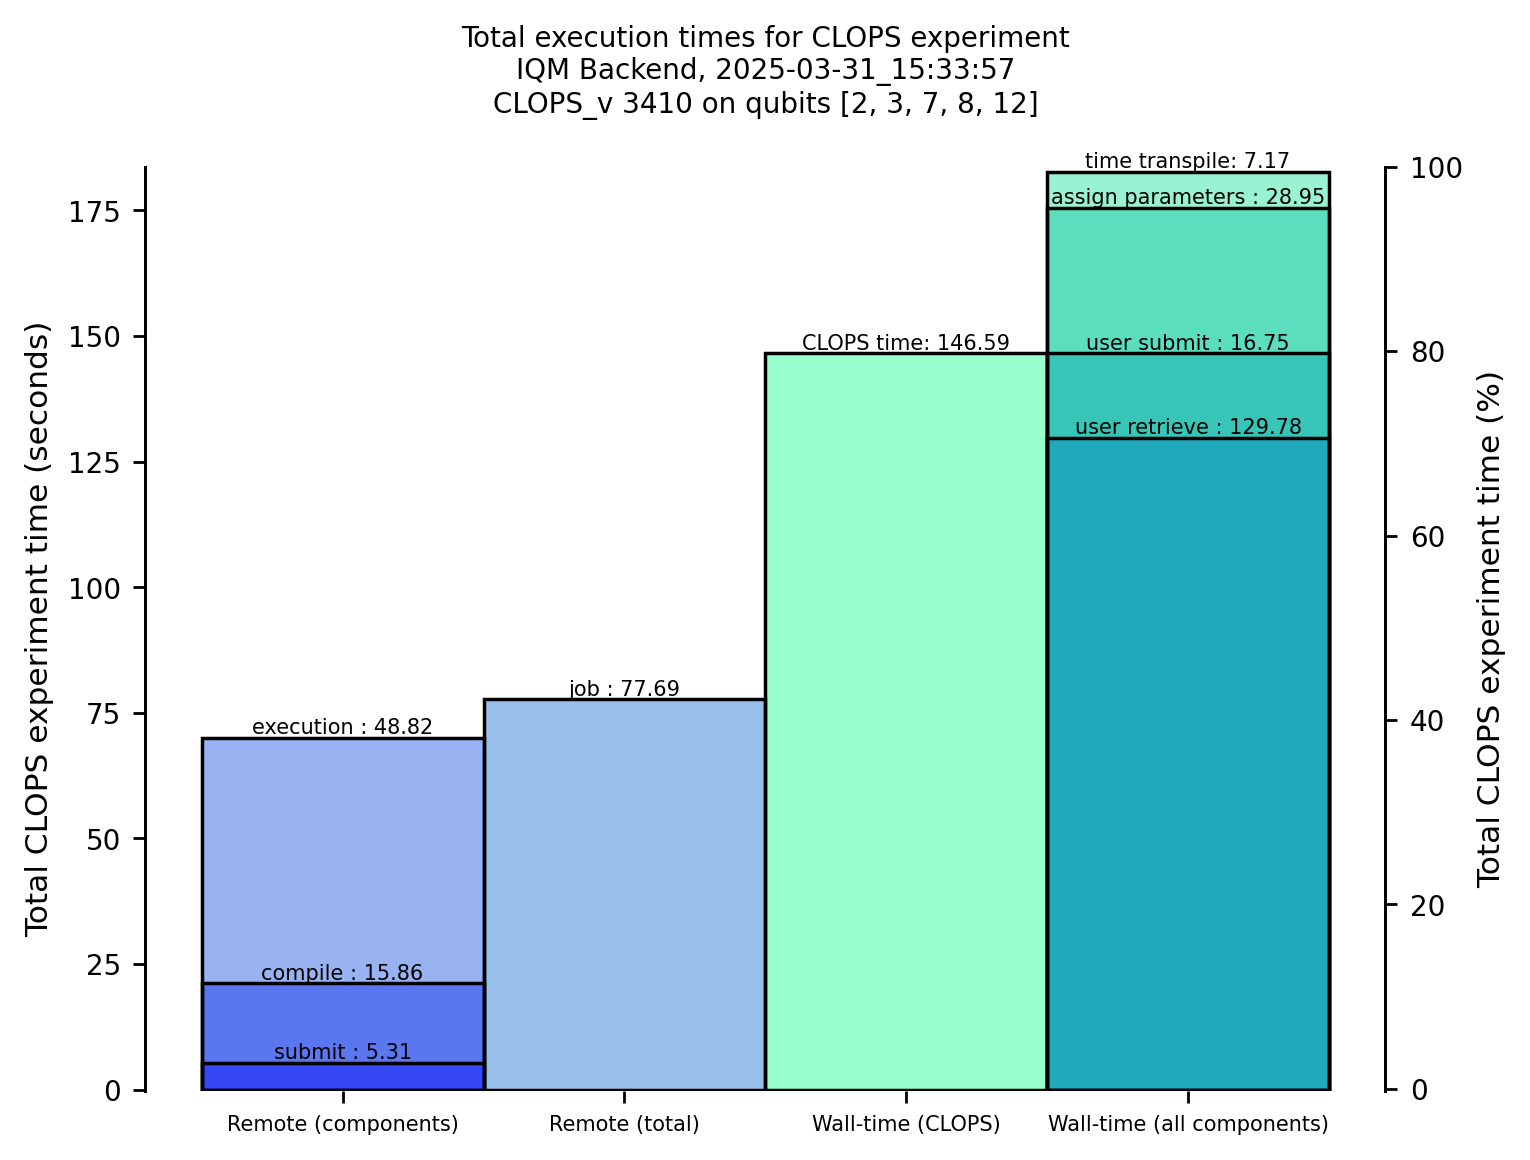

In [58]:
result_clops.plot_all()